In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('card_transdata.csv')
data.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
# Rename the columns to capitalize and replace spaces with underscores
data.columns = [col.upper().replace(' ', '_') for col in data.columns]
# Checking null values for each column
print(data.isna().sum())

DISTANCE_FROM_HOME                0
DISTANCE_FROM_LAST_TRANSACTION    1
RATIO_TO_MEDIAN_PURCHASE_PRICE    1
REPEAT_RETAILER                   1
USED_CHIP                         1
USED_PIN_NUMBER                   1
ONLINE_ORDER                      1
FRAUD                             1
dtype: int64


In [5]:
# Checking total number of rows and columns
data.shape

(41243, 8)

In [6]:
data.describe()

,DISTANCE_FROM_HOME,DISTANCE_FROM_LAST_TRANSACTION,RATIO_TO_MEDIAN_PURCHASE_PRICE,REPEAT_RETAILER,USED_CHIP,USED_PIN_NUMBER,ONLINE_ORDER,FRAUD
count,41243.000000,41242.000000,41242.000000,41242.000000,41242.000000,41242.000000,41242.000000,41242.000000
mean,26.936420,5.115023,1.801843,0.885238,0.351996,0.102323,0.650453,0.087484
std,66.285612,25.057121,2.683173,0.318738,0.477598,0.303076,0.476833,0.282546
min,0.021322,0.000705,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.907466,0.299326,0.475117,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.037900,1.008806,0.995767,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.939749,3.399941,2.076656,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,1872.446884,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data['DISTANCE_RATIO'] = data['DISTANCE_FROM_HOME'] / data['DISTANCE_FROM_LAST_TRANSACTION']

In [9]:
min_value = data['RATIO_TO_MEDIAN_PURCHASE_PRICE'].min()
max_value = data['RATIO_TO_MEDIAN_PURCHASE_PRICE'].max()
data['RATIO_NORMALIZED'] = (data['RATIO_TO_MEDIAN_PURCHASE_PRICE'] - min_value) / (max_value - min_value)

data.head(5)

,DISTANCE_FROM_HOME,DISTANCE_FROM_LAST_TRANSACTION,RATIO_TO_MEDIAN_PURCHASE_PRICE,REPEAT_RETAILER,USED_CHIP,USED_PIN_NUMBER,ONLINE_ORDER,FRAUD,DISTANCE_RATIO,RATIO_NORMALIZED
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,186.018690,0.029699
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,61.676918,0.019694
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,6.323124,0.006392
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,0.401348,0.005393
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,78.008839,0.033949


In [10]:
data['DISTANCE_NORMALIZED'] = (data['DISTANCE_FROM_HOME'] - data['DISTANCE_FROM_HOME'].mean()) / data['DISTANCE_FROM_HOME'].std()

# Define bin edges based on quartiles
bin_edges = [data['DISTANCE_NORMALIZED'].min(), data['DISTANCE_NORMALIZED'].quantile(0.25), data['DISTANCE_NORMALIZED'].quantile(0.5), data['DISTANCE_NORMALIZED'].quantile(0.75), data['DISTANCE_NORMALIZED'].max()]

# Bin the data
data['DISTANCE_CATEGORY'] = pd.cut(data['DISTANCE_NORMALIZED'], bins=bin_edges, labels=False)

# Create binary indicators for the bins
data['DISTANCE_NEAR'] = (data['DISTANCE_CATEGORY'] == 0).astype(int)
data['DISTANCE_MEDIUM'] = (data['DISTANCE_CATEGORY'] == 1).astype(int)
data['DISTANCE_FAR'] = (data['DISTANCE_CATEGORY'] == 2).astype(int)
data['DISTANCE_VERY_FAR'] = (data['DISTANCE_CATEGORY'] == 3).astype(int)

# Drop the intermediate columns as required needed anymore
data.drop(columns=['DISTANCE_NORMALIZED', 'DISTANCE_CATEGORY'], inplace=True)

In [12]:
data.rename(columns={'RATIO_NORMALIZED': 'RATIO_TO_MEDIAN_PURCHASE_NORMALIZED'}, inplace=True)

# Move the target variable 'FRAUD' to the last position of the columns
fraud_column = data.pop('FRAUD')  # Remove 'FRAUD' column and store it
data['FRAUD'] = fraud_column  # Add 'FRAUD' column to the end of the DataFrame

# Get the current column order
current_columns = data.columns.tolist()

# Reorder the columns
desired_columns_order = ['DISTANCE_FROM_HOME', 'DISTANCE_FROM_LAST_TRANSACTION', 'DISTANCE_RATIO'] + [col for col in current_columns if col not in ['DISTANCE_FROM_HOME', 'DISTANCE_FROM_LAST_TRANSACTION', 'DISTANCE_RATIO']]
data = data[desired_columns_order]

data.head(5)


,DISTANCE_FROM_HOME,DISTANCE_FROM_LAST_TRANSACTION,DISTANCE_RATIO,RATIO_TO_MEDIAN_PURCHASE_PRICE,REPEAT_RETAILER,USED_CHIP,USED_PIN_NUMBER,ONLINE_ORDER,RATIO_TO_MEDIAN_PURCHASE_NORMALIZED,DISTANCE_NEAR,DISTANCE_MEDIUM,DISTANCE_FAR,DISTANCE_VERY_FAR,FRAUD
0,57.877857,0.311140,186.018690,1.945940,1.0,1.0,0.0,0.0,0.029699,0,0,0,1,0.0
1,10.829943,0.175592,61.676918,1.294219,1.0,0.0,0.0,0.0,0.019694,0,0,1,0,0.0
2,5.091079,0.805153,6.323124,0.427715,1.0,0.0,0.0,1.0,0.006392,0,1,0,0,0.0
3,2.247564,5.600044,0.401348,0.362663,1.0,1.0,0.0,1.0,0.005393,1,0,0,0,0.0
4,44.190936,0.566486,78.008839,2.222767,1.0,1.0,0.0,1.0,0.033949,0,0,0,1,0.0


In [13]:
# Count the values of 0 and 1 in the 'FRAUD' column
fraud_counts = data['FRAUD'].value_counts()

# Calculate the percentage of fraudulent transactions
fraud_ratio = fraud_counts[1] / fraud_counts[0] * 100

# Display the results
print("Number of fraudulent transactions (FRAUD = 1):", fraud_counts[1])
print("Number of non-fraudulent transactions (FRAUD = 0):", fraud_counts[0])
print("\nPercentage of fraudulent transactions: {:.2f}%".format(fraud_ratio))

Number of fraudulent transactions (FRAUD = 1): 3608
Number of non-fraudulent transactions (FRAUD = 0): 37634

Percentage of fraudulent transactions: 9.59%


In [16]:
# Set a random seed for reproducibility
np.random.seed(42)

# Create a subset of the dataset with 50,000 randomly selected datapoints
subset_data = data.sample(n=50000,replace=True)

# Count the values of 0 and 1 in the 'FRAUD' column for the subset
subset_fraud_counts = subset_data['FRAUD'].value_counts()

# Calculate the percentage of fraudulent transactions for the subset
subset_ratio = (subset_fraud_counts[1] / subset_fraud_counts[0]) * 100

# Display the results
print("Number of fraudulent transactions (FRAUD = 1):", subset_fraud_counts[1])
print("Number of non-fraudulent transactions (FRAUD = 0):", subset_fraud_counts[0])
print("\nPercentage of fraudulent transactions in the subset: {:.2f}%".format(subset_ratio))

Number of fraudulent transactions (FRAUD = 1): 4379
Number of non-fraudulent transactions (FRAUD = 0): 45621

Percentage of fraudulent transactions in the subset: 9.60%


In [17]:
subset_data.describe()

,DISTANCE_FROM_HOME,DISTANCE_FROM_LAST_TRANSACTION,DISTANCE_RATIO,RATIO_TO_MEDIAN_PURCHASE_PRICE,REPEAT_RETAILER,USED_CHIP,USED_PIN_NUMBER,ONLINE_ORDER,RATIO_TO_MEDIAN_PURCHASE_NORMALIZED,DISTANCE_NEAR,DISTANCE_MEDIUM,DISTANCE_FAR,DISTANCE_VERY_FAR,FRAUD
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,26.828263,5.202860,140.371085,1.812593,0.884480,0.353260,0.10306,0.654480,0.027652,0.251460,0.247160,0.250260,0.25110,0.087580
std,65.313812,25.203834,1392.404855,2.695845,0.319652,0.477987,0.30404,0.475542,0.041386,0.433857,0.431365,0.433167,0.43365,0.282686
min,0.021322,0.000705,0.000417,0.011373,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.885627,0.303464,2.105963,0.474930,1.000000,0.000000,0.00000,0.000000,0.007116,0.000000,0.000000,0.000000,0.00000,0.000000
50%,10.106027,1.004831,10.009999,1.003290,1.000000,0.000000,0.00000,1.000000,0.015228,0.000000,0.000000,0.000000,0.00000,0.000000
75%,26.076203,3.408687,46.402848,2.092376,1.000000,1.000000,0.00000,1.000000,0.031947,1.000000,0.000000,1.000000,1.00000,0.000000
max,4601.011222,1872.446884,128010.049391,65.150879,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


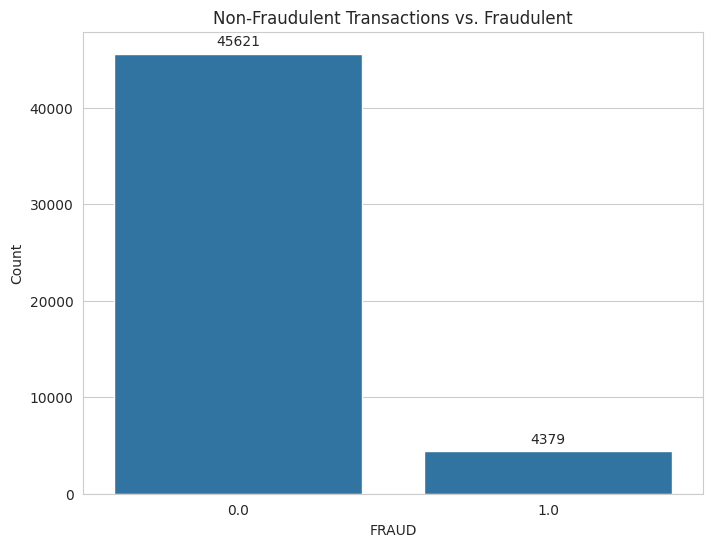

In [18]:
# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Plotting the bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=subset_data, x='FRAUD')
plt.title('Non-Fraudulent Transactions vs. Fraudulent')
plt.xlabel('FRAUD')
plt.ylabel('Count')

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()


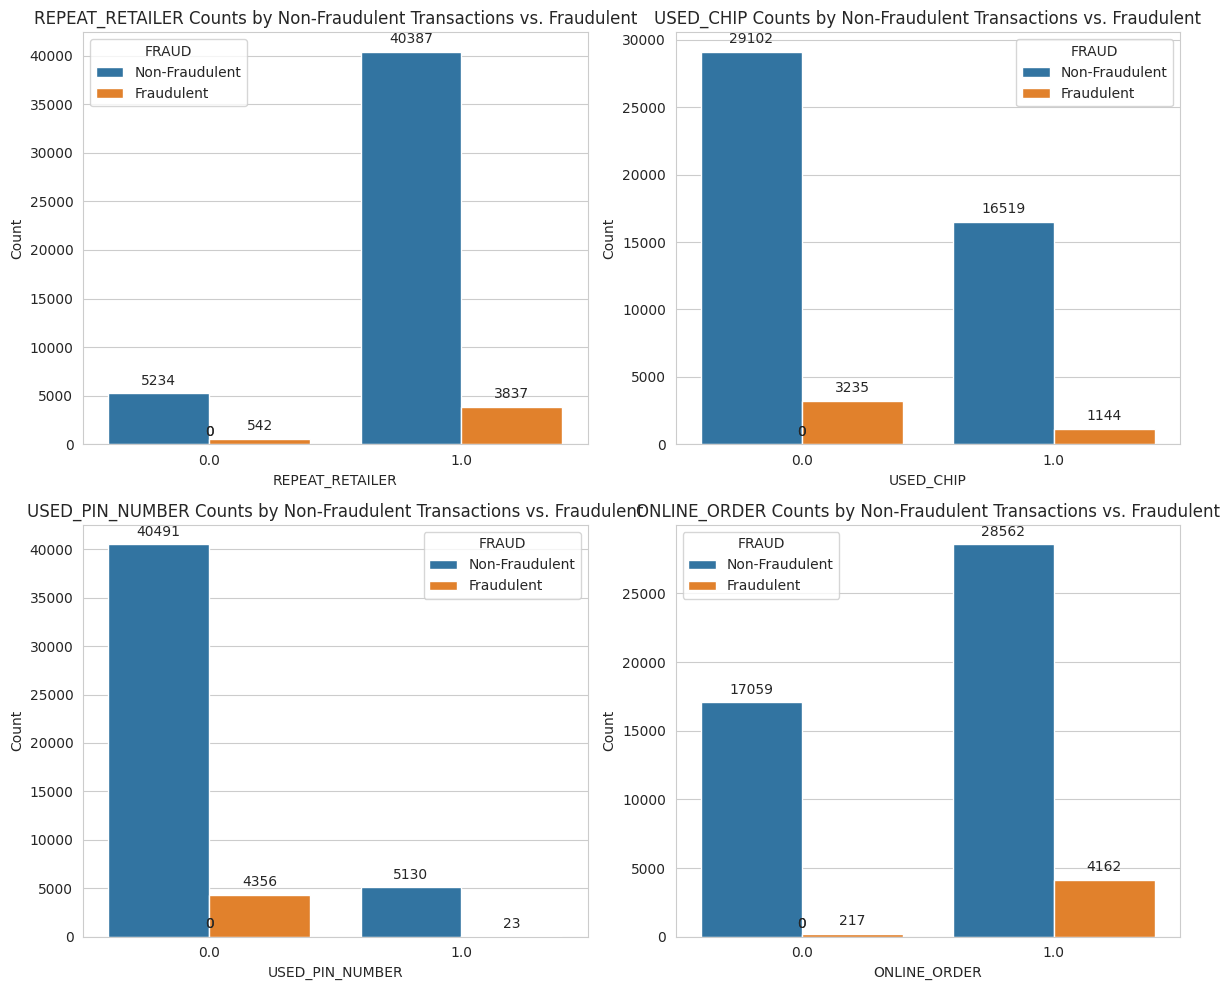

In [19]:
# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Define the categorical features you want to compare
categorical_features = ['REPEAT_RETAILER', 'USED_CHIP', 'USED_PIN_NUMBER', 'ONLINE_ORDER']

# Plotting the bar plots for each categorical feature in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    ax = sns.countplot(data=subset_data, x=feature, hue='FRAUD', ax=axes[i])
    ax.set_title(f'{feature} Counts by Non-Fraudulent Transactions vs. Fraudulent')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='FRAUD', labels=['Non-Fraudulent', 'Fraudulent'])

    # Adding data labels
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

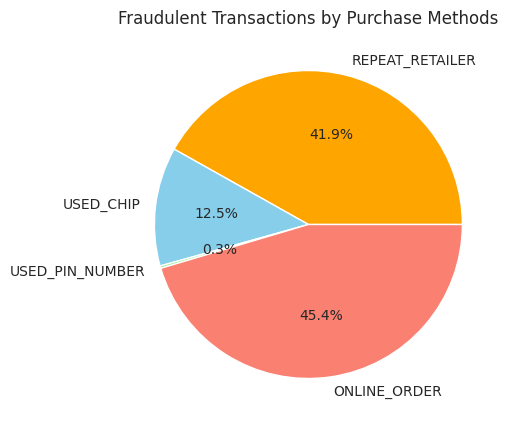

In [20]:
purchase_methods = ['REPEAT_RETAILER', 'USED_CHIP', 'USED_PIN_NUMBER', 'ONLINE_ORDER']

# Plotting the count of fraudulent transactions for each purchase method using a pie chart
plt.figure(figsize=(5, 5))

# Iterate through each purchase method and calculate the count of fraudulent transactions
fraudulent_counts = [subset_data[subset_data[method] == 1]['FRAUD'].sum() for method in purchase_methods]

# Plot the pie chart
plt.pie(fraudulent_counts, labels=purchase_methods, autopct='%1.1f%%', colors=['orange', 'skyblue', 'lightgreen', 'salmon'])

# Set title
plt.title('Fraudulent Transactions by Purchase Methods')

plt.show()


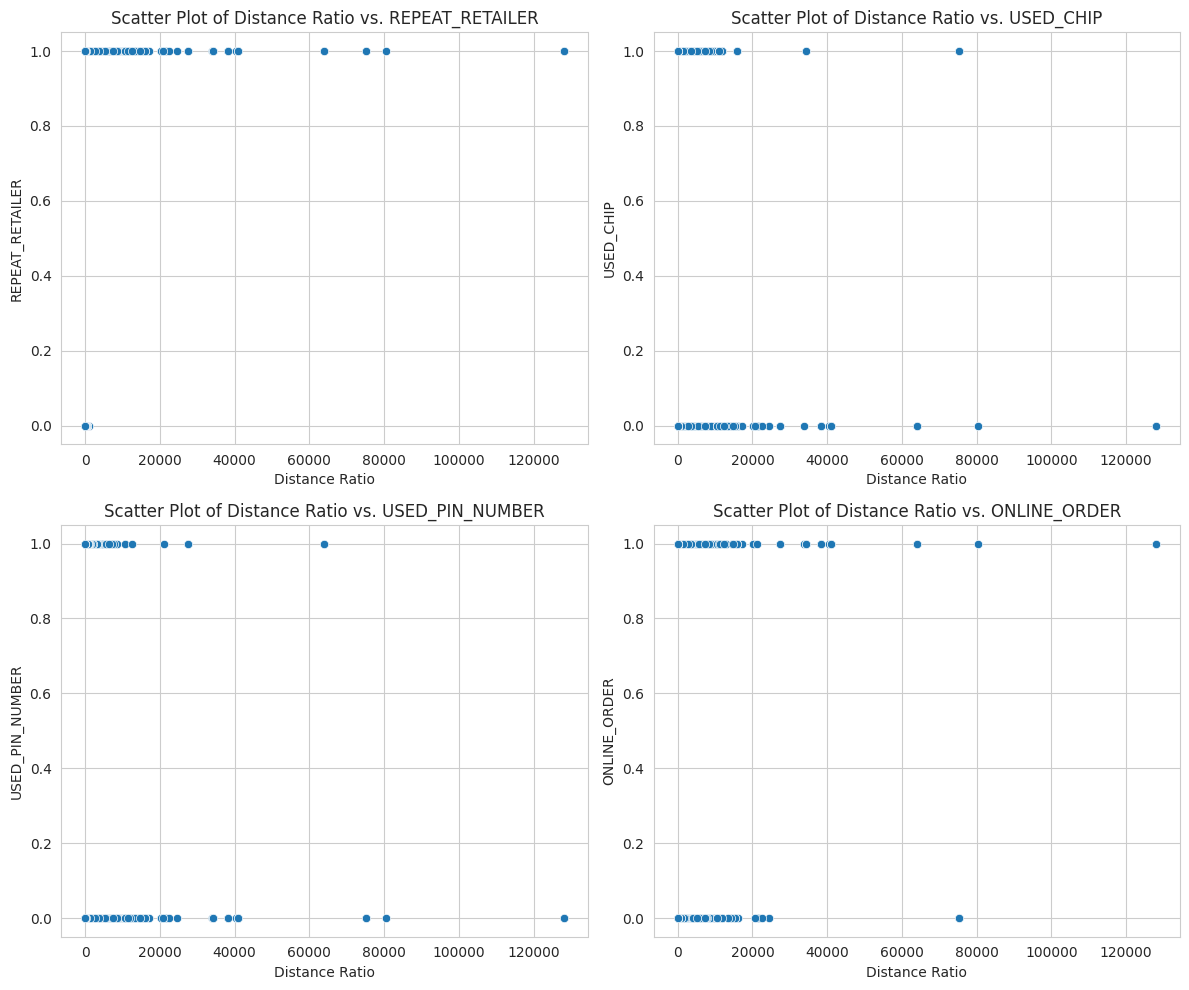

In [22]:
# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Purchase methods to compare
purchase_methods = ['REPEAT_RETAILER', 'USED_CHIP', 'USED_PIN_NUMBER', 'ONLINE_ORDER']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each purchase method and plot the scatter plot in each subplot
for i, method in enumerate(purchase_methods):
    sns.scatterplot(data=subset_data, x='DISTANCE_RATIO', y=method, ax=axes[i])
    axes[i].set_xlabel('Distance Ratio')
    axes[i].set_ylabel(method)
    axes[i].set_title(f'Scatter Plot of Distance Ratio vs. {method}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

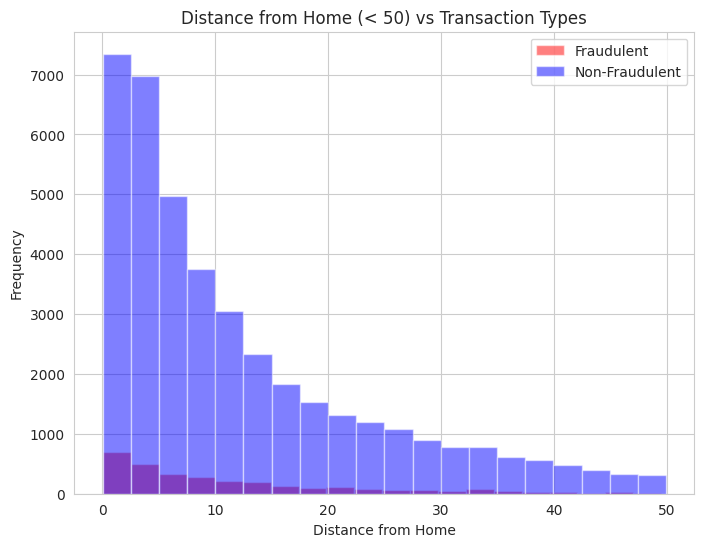

In [23]:
# Filter data by fraud category and distance from home values less than 50
fraudulent_transactions = subset_data[(subset_data['FRAUD'] == 1) & (subset_data['DISTANCE_FROM_HOME'] < 50)]['DISTANCE_FROM_HOME']
non_fraudulent_transactions = subset_data[(subset_data['FRAUD'] == 0) & (subset_data['DISTANCE_FROM_HOME'] < 50)]['DISTANCE_FROM_HOME']

# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Create a histogram
plt.hist(fraudulent_transactions, bins=20, alpha=0.5, color='red', label='Fraudulent')
plt.hist(non_fraudulent_transactions, bins=20, alpha=0.5, color='blue', label='Non-Fraudulent')

plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.title('Distance from Home (< 50) vs Transaction Types')
plt.legend()

# Show the histogram
plt.show()


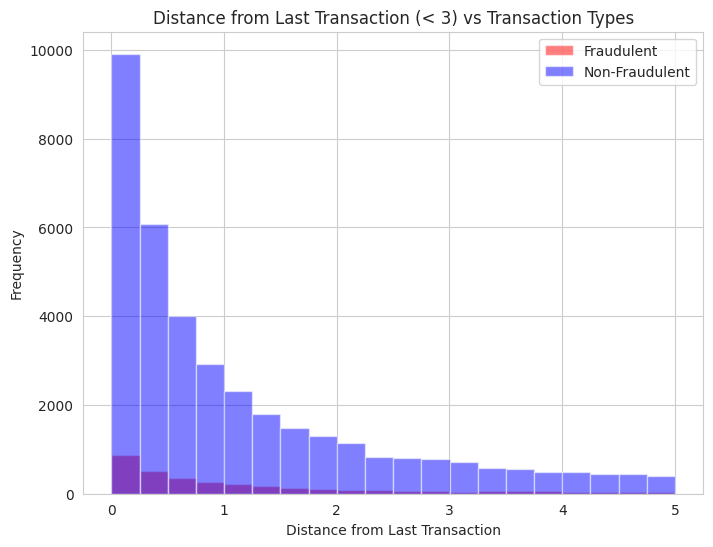

In [24]:
# Filter data by fraud category and distance from last transaction values less than 5
fraudulent_transactions = subset_data[(subset_data['FRAUD'] == 1) & (subset_data['DISTANCE_FROM_LAST_TRANSACTION'] < 5)]['DISTANCE_FROM_LAST_TRANSACTION']
non_fraudulent_transactions = subset_data[(subset_data['FRAUD'] == 0) & (subset_data['DISTANCE_FROM_LAST_TRANSACTION'] < 5)]['DISTANCE_FROM_LAST_TRANSACTION']

# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Create a histogram
plt.hist(fraudulent_transactions, bins=20, alpha=0.5, color='red', label='Fraudulent')
plt.hist(non_fraudulent_transactions, bins=20, alpha=0.5, color='blue', label='Non-Fraudulent')

plt.xlabel('Distance from Last Transaction')
plt.ylabel('Frequency')
plt.title('Distance from Last Transaction (< 3) vs Transaction Types')
plt.legend()

# Show the histogram
plt.show()

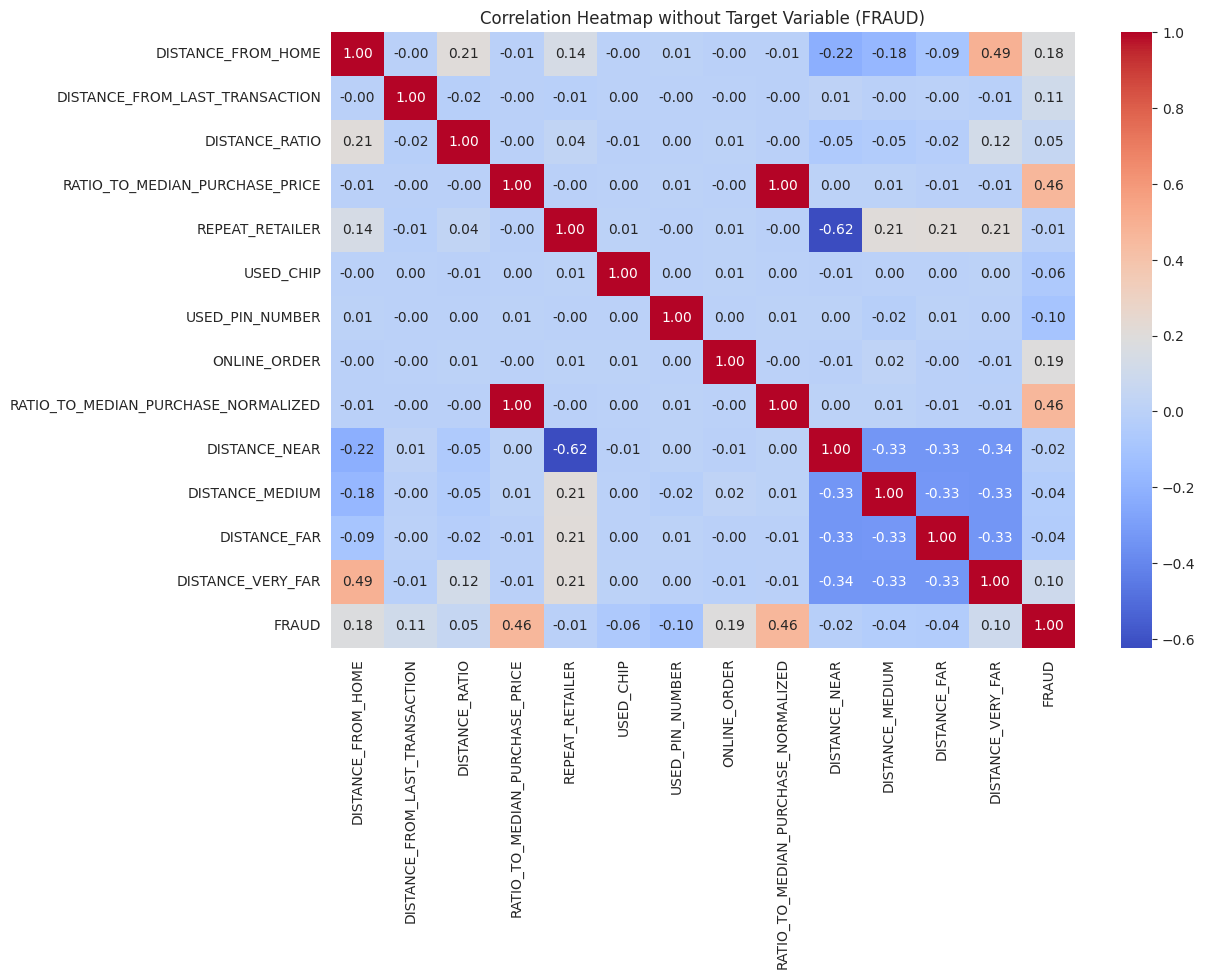

In [25]:
# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap without Target Variable (FRAUD)')
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
!pip install dmba
from dmba import regressionSummary, classificationSummary

# Specify predictors and outcome variable
predictors = ['DISTANCE_FROM_HOME', 'DISTANCE_FROM_LAST_TRANSACTION', 'ONLINE_ORDER', 'RATIO_TO_MEDIAN_PURCHASE_NORMALIZED', 'DISTANCE_VERY_FAR']
outcome = 'FRAUD'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(subset_data[predictors], subset_data[outcome], test_size=0.4, random_state=42)

# Fit linear regression model
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lm_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse:.4f}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.6 MB/s eta 0:00:00
Colab environment detected.
Root Mean Squared Error: 0.2391


In [31]:
# Linear regression training set statistics
regressionSummary(y_train, lm_model.predict(X_train))


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.2355
     Mean Absolute Error (MAE) : 0.1361


In [32]:
# Linear regression testing set statistics
regressionSummary(y_test, lm_model.predict(X_test))


Regression statistics

               Mean Error (ME) : 0.0015
Root Mean Squared Error (RMSE) : 0.2391
     Mean Absolute Error (MAE) : 0.1390


In [33]:
# Generate predictions using the trained linear regression model and compare with actual values
model_pred = lm_model.predict(X_test)
result = pd.DataFrame({'Predicted': model_pred, 'Actual': y_test, 'Residual': y_test - model_pred})
print(result.head(20))

       Predicted  Actual  Residual
5081   -0.086674     0.0  0.086674
9677    0.036524     0.0 -0.036524
15708   0.085433     0.0 -0.085433
28440   0.204601     0.0 -0.204601
5109    0.155100     0.0 -0.155100
7611    0.132917     0.0 -0.132917
17140   0.116437     0.0 -0.116437
28519   0.095786     0.0 -0.095786
36468   0.021461     0.0 -0.021461
34808  -0.052210     0.0  0.052210
38367   0.060087     0.0 -0.060087
13771  -0.031175     0.0  0.031175
4321   -0.100801     0.0  0.100801
23265   0.425695     1.0  0.574305
21462   0.031783     0.0 -0.031783
21593   0.110953     0.0 -0.110953
6360   -0.017079     0.0  0.017079
24992   0.142832     0.0 -0.142832
7897    0.036896     0.0 -0.036896
17326   0.082085     0.0 -0.082085


In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Specify predictors and outcome variable
predictors = ['DISTANCE_FROM_HOME', 'DISTANCE_FROM_LAST_TRANSACTION', 'ONLINE_ORDER', 'RATIO_TO_MEDIAN_PURCHASE_NORMALIZED', 'DISTANCE_VERY_FAR']
outcome = 'FRAUD'

# Extract predictors and outcome variable from the dataset
X = subset_data[predictors]
y = subset_data[outcome]

# Split data into training and testing sets
X_train, X_test, y_train, y1_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and fit Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y1_pred = model.predict(X_test)
# Calculate accuracy
accuracy_nb = accuracy_score(y1_test, y1_pred)
print("Accuracy: {:.4f}".format(accuracy_nb))

Accuracy: 0.8783


In [36]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y1_test, y1_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     18200
         1.0       0.18      0.10      0.13      1800

    accuracy                           0.88     20000
   macro avg       0.55      0.53      0.53     20000
weighted avg       0.85      0.88      0.86     20000



k = 1, Accuracy = 0.9510
k = 2, Accuracy = 0.9333
k = 3, Accuracy = 0.9263
k = 4, Accuracy = 0.9225
k = 5, Accuracy = 0.9200
k = 6, Accuracy = 0.9192
k = 7, Accuracy = 0.9175
k = 8, Accuracy = 0.9155
k = 9, Accuracy = 0.9147
k = 10, Accuracy = 0.9146
k = 11, Accuracy = 0.9143
k = 12, Accuracy = 0.9133
k = 13, Accuracy = 0.9132
k = 14, Accuracy = 0.9128


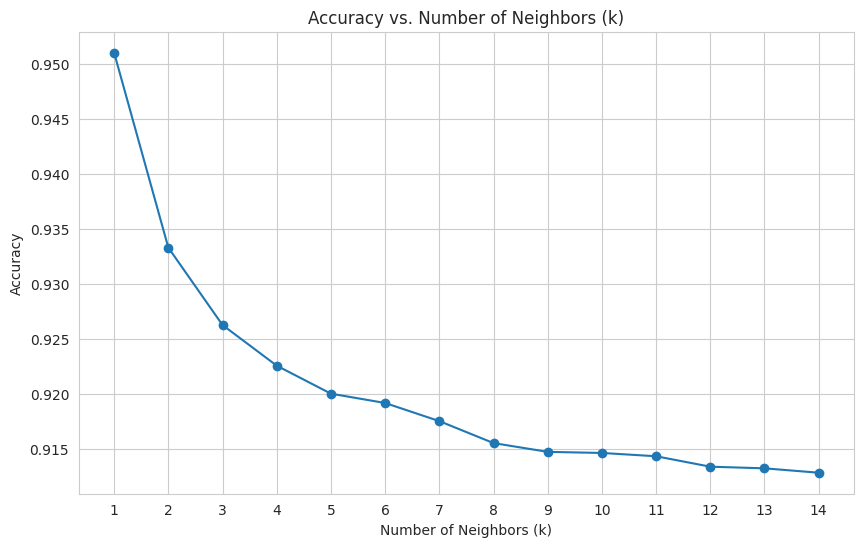

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Specify predictors and outcome variable
predictors = ['DISTANCE_FROM_HOME', 'DISTANCE_FROM_LAST_TRANSACTION', 'ONLINE_ORDER', 'RATIO_TO_MEDIAN_PURCHASE_NORMALIZED', 'DISTANCE_VERY_FAR']
outcome = 'FRAUD'

# Extract predictors and outcome variable from the dataset
X = subset_data[predictors]
y = subset_data[outcome]

# Split data into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize a list to store results
results = []
# Train a KNN classifier for different values of k
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    y_pred = knn.predict(valid_X)
    accuracy = accuracy_score(valid_y, y_pred)
    results.append({'k': k, 'accuracy': accuracy})

# Display the results and plot the accuracy for different values of k
plt.figure(figsize=(10, 6))
for result in results:
    print(f"k = {result['k']}, Accuracy = {result['accuracy']:.4f}")

k_values = [result['k'] for result in results]
accuracies = [result['accuracy'] for result in results]
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 15))
plt.show()

In [40]:
# Get the best k value
best_k = max(results, key=lambda x: x['accuracy'])['k']

# Train the KNN classifier with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(train_X, train_y)

# Get predictions on the validation set using the best k value
best_valid_preds = best_knn.predict(valid_X)

# Generate classification report for the best k value
class_report = classification_report(valid_y, best_valid_preds)

# Print the classification report
print("Classification Report for k =", best_k)
print(class_report)

Classification Report for k = 1
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     18200
         1.0       0.76      0.67      0.71      1800

    accuracy                           0.95     20000
   macro avg       0.86      0.82      0.84     20000
weighted avg       0.95      0.95      0.95     20000



In [44]:
from sklearn.tree import DecisionTreeClassifier

# Specify predictors and outcome variable
predictors = ['DISTANCE_FROM_HOME', 'DISTANCE_FROM_LAST_TRANSACTION', 'ONLINE_ORDER', 'RATIO_TO_MEDIAN_PURCHASE_NORMALIZED', 'DISTANCE_VERY_FAR']
outcome = 'FRAUD'

# Extract predictors and outcome variable from the dataset
X = subset_data[predictors]
y = subset_data[outcome]

# Split data into training and validation sets
train_X, valid_X, train_y, valid__y = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and fit the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(train_X, train_y)

# Predict on the validation set
valid__preds = model.predict(valid_X)
# Calculate accuracy
accuracy_dt = accuracy_score(valid__y, valid__preds)
print("Accuracy:", round(accuracy_dt, 4))


Accuracy: 0.9834


In [45]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(valid__y, valid__preds))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18200
         1.0       0.92      0.89      0.91      1800

    accuracy                           0.98     20000
   macro avg       0.96      0.94      0.95     20000
weighted avg       0.98      0.98      0.98     20000



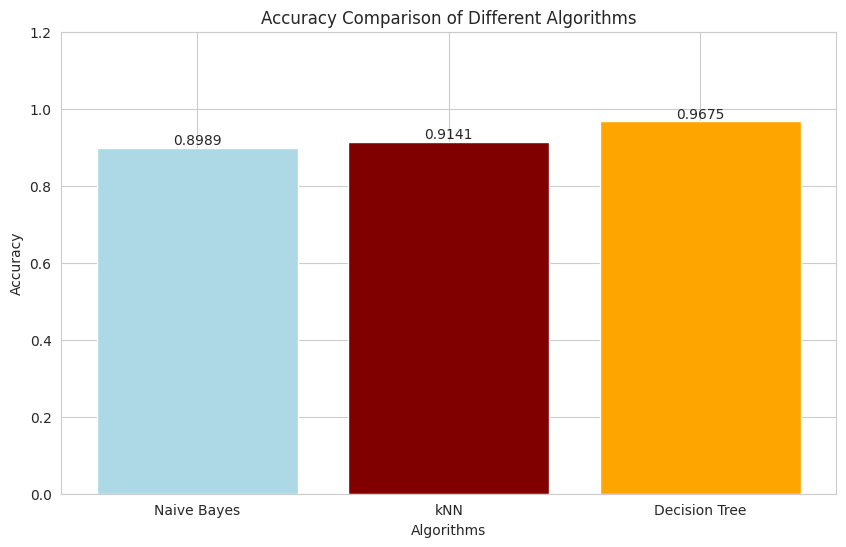

In [51]:
import matplotlib.pyplot as plt

# Scores and algorithms
scores = [0.8989, 0.9141, 0.9675]
algorithms = ['Naive Bayes', 'kNN', 'Decision Tree']

# Plot histogram with different color schemes
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, scores, color=['lightblue', 'maroon', 'orange'])

# Add labels to the bars
for bar, score in zip(bars, scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{score:.4f}', ha='center', va='bottom')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylim(0, 1.2)
plt.show()